In [ ]:
import pandas as pd

# Load the dataset
file_path = 'https://github.com/saifrahmania/Data36118/raw/refs/heads/main/Assignment1/Data/ASCDataset/Australian%20Skills%20Classification%20-%20December%202023.xlsx'
data = pd.read_excel(file_path)

# Checking for missing values
missing_values = data.isnull().sum()

# Checking for duplicate entries
duplicate_values = data.duplicated().sum()

# Describing the data to understand the distribution
data_description = data.describe(include='all')

missing_values, duplicate_values, data_description


(Unnamed: 0    10
 Unnamed: 1    30
 dtype: int64,
 9,
                                Unnamed: 0  \
 count                                  30   
 unique                                 30   
 top     Australian Skills Classification    
 freq                                    1   
 
                                             Unnamed: 1  
 count                                               10  
 unique                                              10  
 top     Explanation of key terms used in this dataset.  
 freq                                                 1  )

In [ ]:
import string

# Remove duplicates
data_cleaned = data.drop_duplicates()

# Handling missing values
data_cleaned = data_cleaned.dropna()

# Remove punctuation and special characters from the data
def remove_punctuation(text):
    # Define the punctuation translation table: maps all punctuation to None
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the function to clean data
data_cleaned['Unnamed: 1'] = data_cleaned['Unnamed: 1'].apply(remove_punctuation)

# Display the cleaned data
data_cleaned


,Unnamed: 0,Unnamed: 1
3,Glossary,Explanation of key terms used in this dataset
4,Occupation descriptions,ANZSCO Occupation codes and descriptions\nSubp...
5,Core competency descriptions,Descriptions for each core competency and the ...
6,Core competencies data,List of 10 core competencies and their respect...
7,Specialist task hierarchy,List of specialist tasks present in the Austra...
8,Specialist task data,Specialist Tasks and indicative time spent on ...
9,Technology tools hierarchy,List of the technology tools present in the Au...
10,Technology tools,Highly specialised and occupationspecific tech...
11,Appendix - tech tool examples,For each technology tool examples of that tool...
12,Appendix - common tech tools,List of technology tools that are so universal...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure that the NLTK tokenization resources are available
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Tokenizing the 'Unnamed: 1' column
data_cleaned['tokens'] = data_cleaned['Unnamed: 1'].apply(word_tokenize)

# Display the dataframe with tokens
data_cleaned[['Unnamed: 0', 'tokens']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Unnamed: 0,tokens
3,Glossary,"[Explanation, of, key, terms, used, in, this, ..."
4,Occupation descriptions,"[ANZSCO, Occupation, codes, and, descriptions,..."
5,Core competency descriptions,"[Descriptions, for, each, core, competency, an..."
6,Core competencies data,"[List, of, 10, core, competencies, and, their,..."
7,Specialist task hierarchy,"[List, of, specialist, tasks, present, in, the..."
8,Specialist task data,"[Specialist, Tasks, and, indicative, time, spe..."
9,Technology tools hierarchy,"[List, of, the, technology, tools, present, in..."
10,Technology tools,"[Highly, specialised, and, occupationspecific,..."
11,Appendix - tech tool examples,"[For, each, technology, tool, examples, of, th..."
12,Appendix - common tech tools,"[List, of, technology, tools, that, are, so, u..."


In [ ]:
# Basic tokenization using string split (alternative to NLTK word_tokenize)
data_cleaned['basic_tokens'] = data_cleaned['Unnamed: 1'].apply(lambda x: x.split())

# Display the dataframe with basic tokens
data_cleaned[['Unnamed: 0', 'basic_tokens']]



,Unnamed: 0,basic_tokens
3,Glossary,"[Explanation, of, key, terms, used, in, this, ..."
4,Occupation descriptions,"[ANZSCO, Occupation, codes, and, descriptions,..."
5,Core competency descriptions,"[Descriptions, for, each, core, competency, an..."
6,Core competencies data,"[List, of, 10, core, competencies, and, their,..."
7,Specialist task hierarchy,"[List, of, specialist, tasks, present, in, the..."
8,Specialist task data,"[Specialist, Tasks, and, indicative, time, spe..."
9,Technology tools hierarchy,"[List, of, the, technology, tools, present, in..."
10,Technology tools,"[Highly, specialised, and, occupationspecific,..."
11,Appendix - tech tool examples,"[For, each, technology, tool, examples, of, th..."
12,Appendix - common tech tools,"[List, of, technology, tools, that, are, so, u..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'processed' column contains preprocessed text
vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(data_cleaned['Unnamed: 1'])

# Get feature names to use as keywords
feature_array = vectorizer.get_feature_names_out()

# Fetch top 10 keywords per document
top_n = 10
sorted_items = tfidf_matrix.toarray().argsort(axis=1)[:, -top_n:]
keywords_tfidf = [[feature_array[i] for i in row] for row in sorted_items]

# Display keywords for the first few documents
for doc_keywords in keywords_tfidf[:5]:
    print(doc_keywords)


['featured', 'illustrates', 'glossary', 'hierarchy', 'highly', 'used', 'explanation', 'key', 'terms', 'dataset']
['information', 'descriptions', 'tab', 'subprofile', 'specialisation', 'refer', 'nec', 'anzsco', 'codes', 'occupation']
['hierarchy', 'highly', 'illustrates', 'indicative', 'descriptions', 'anchor', 'definition', 'value', 'core', 'competency']
['engines', 'occupation', 'list', 'core', 'respective', '10', 'proficiency', 'competencies', 'scores', 'levels']
['transferability', 'clusters', 'shows', 'hierarchy', 'connected', 'related', 'cluster', 'illustrates', 'specialist', 'skills']


In [ ]:
# !pip install yake
import yake
from nltk.stem import WordNetLemmatizer, PorterStemmer


# Define the preprocessing function
def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove non-alphabetic characters
    tokens = [token for token in tokens if token.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the specific column, assumed to be 'Unnamed: 1'
data_cleaned['processed'] = data_cleaned['Unnamed: 1'].astype(str).apply(preprocess)

# Initialize YAKE keyword extractor
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 10
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

# Apply YAKE to each document in the 'processed' column
keywords_yake = [kw_extractor.extract_keywords(doc) for doc in data_cleaned['processed']]

# Display extracted keywords for the first few documents
for doc_keywords in keywords_yake[:5]:
    print(doc_keywords)

[('explan key term', 0.01655915082773619), ('explan key', 0.04940384002065631), ('term use dataset', 0.04940384002065631), ('key term', 0.09700399286574239), ('explan', 0.15831692877998726), ('dataset', 0.15831692877998726), ('key', 0.29736558256021506), ('term', 0.29736558256021506)]
[('found glossari tab', 0.001437122515396165), ('elsewher classifi nec', 0.002006500615544678), ('classifi nec categori', 0.002006500615544678), ('nec categori inform', 0.002006500615544678), ('categori inform found', 0.002006500615544678), ('inform found glossari', 0.002006500615544678), ('code descript subprofil', 0.0025965475982849483), ('subprofil code refer', 0.0025965475982849483), ('descript subprofil code', 0.0025965475982849488), ('anzsco occup code', 0.0033977979232347037)]
[('compet anchor valu', 0.005545854811343401), ('descript core compet', 0.006249265289383423), ('core compet definit', 0.010456048867975921), ('compet definit core', 0.010456048867975921), ('definit core compet', 0.0104560488

<Axes: title={'center': 'Sentiment Distribution'}, ylabel='Frequency'>

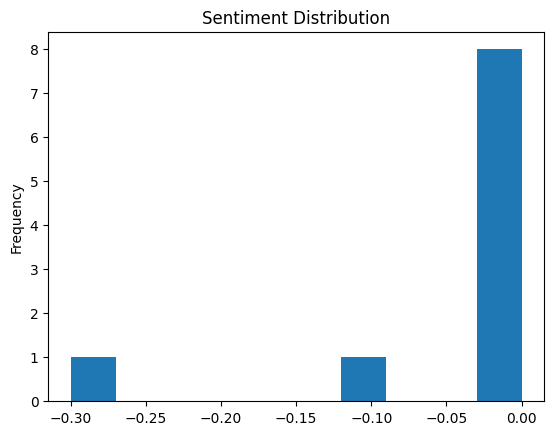

In [ ]:
import pandas as pd
from textblob import TextBlob


# Sentiment analysis function
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Polarity score

# Apply sentiment analysis
data_cleaned['sentiment'] = data_cleaned['processed'].apply(get_sentiment)

# Plotting sentiment distribution
data_cleaned['sentiment'].plot(kind='hist', title='Sentiment Distribution')


In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Tokenization for Word2Vec training
data_cleaned['tokens'] = data_cleaned['processed'].apply(lambda x: x.split())

# Train Word2Vec model
model = Word2Vec(sentences=data_cleaned['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Function to average word vectors for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Average vectors for each document
vocabulary = set(model.wv.index_to_key)
features = [average_word_vectors(tokenized_sentence, model, vocabulary, 100) for tokenized_sentence in data_cleaned['tokens']]
feature_matrix = np.array(features)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(feature_matrix)

# Function to find similar skills
def find_similar_skills(skill_index, similarity_matrix, top_n=5):
    skill_similarities = similarity_matrix[skill_index]
    similar_indices = np.argsort(-skill_similarities)[1:top_n+1]
    similar_scores = [(data_cleaned.iloc[i]['Unnamed: 1'], skill_similarities[i]) for i in similar_indices]
    return similar_scores

# Example: find skills similar to the first entry
similar_skills = find_similar_skills(0, similarity_matrix, top_n=5)
print(f"Skills similar to '{data_cleaned.iloc[0]['Unnamed: 1']}':")
for skill, score in similar_skills:
    print(f"{skill}: {score:.2f}")

Skills similar to 'Explanation of key terms used in this dataset':
List of technology tools that are so universal today that they are likely to be used by most or all occupations and these are listed here: 0.27
For each technology tool examples of that tool that are used in Australia are provided: 0.12
List of 10 core competencies and their respective proficiency scores and levels for each occupation: -0.01
Specialist Tasks and indicative time spent on that task for each occupation
Subprofile codes refer to whether an occupation is a specialisation of an occupation or is an occupation in a not elsewhere classified nec category Further information can be found in the Glossary tab: -0.03
List of the technology tools present in the Australian Skills Classification and descriptions for each of them: -0.06


In [ ]:
def prepare_skill_matching(df1, df2, column_name='skill_name'):
    # Vectorize skill names
    vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
    tfidf = vectorizer.fit_transform(pd.concat([df1[column_name], df2[column_name]]))

    # Compute cosine similarity matrix
    sim_matrix = cosine_similarity(tfidf, tfidf)

    # Matching logic: match skills with highest similarity score
    matches = []
    for i in range(len(df1)):
        sim_scores = sim_matrix[i, len(df1):]
        top_match = sim_scores.argmax()
        if sim_scores[top_match] > 0.8:  # Threshold for matching
            matches.append((df1[column_name].iloc[i], df2[column_name].iloc[top_match]))
    return matches

# Example usage
matches = prepare_skill_matching(asc_df, esco_df)
print(matches)

NameError: name 'asc_df' is not defined

In [ ]:
def find_unique_skills(df1, df2, matches):
    df1_skills = set(df1['skill_name'])
    df2_skills = set(df2['skill_name'])
    matched_skills = set([m[0] for m in matches])

    unique_df1 = df1_skills - matched_skills
    unique_df2 = df2_skills - matched_skills

    return unique_df1, unique_df2

unique_asc, unique_esco = find_unique_skills(asc_df, esco_df, matches)
print("Unique ASC Skills:", unique_asc)
print("Unique ESCO Skills:", unique_esco)

In [ ]:
# Assuming you have a 'demand_score' or similar metric in your data
asc_df['demand_score'].plot(kind='hist', title='ASC Skill Demand Distribution')
esco_df['demand_score'].plot(kind='hist', title='ESCO Skill Demand Distribution')


In [ ]:
import pandas as pd

In [ ]:
url = 'https://github.com/saifrahmania/Data36118/raw/refs/heads/main/Assignment1/Data/SFIADataset/sfia-9_current-standard_en_US_250129.csv'
df = pd.read_csv(url)


In [ ]:
import pandas as pd

url = 'https://github.com/saifrahmania/Data36118/raw/refs/heads/main/Assignment1/Data/SFIADataset/sfia-9_current-standard_en_US_250129.csv'
# Explicitly specify the encoding as 'latin-1' or 'ISO-8859-1'
df = pd.read_csv(url, encoding='latin-1')
df.head()
